In [1]:
'''
Look at supplemental catalogue

Look at the rotation for different mass bins.

Look at rotation for "added galaxies"
'''
#Imports
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table, join
import illustris_python as il
from astropy.table import setdiff
import time as time
import scipy.signal as signal
import scipy.interpolate as interpolate
from astropy.cosmology import Planck15 as cosmo
import h5py
#import astropy.io.misc.hdf5.read_table_hdf5

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:80% !important; }</style>"))

In [3]:
"""
300-1 Loading
"""
basePath = '/home/mattbel/Desktop/Research/BhuvSummer2020/Illustris-300-1/output'
snapshot_ind = 66


"""
100-3 Loading
basePath = '/home/mattbel/Desktop/Research/BhuvSummer2020/Illustris-100-3/ouput'
snapshot_ind = 66
"""


#Header gives basic group info
header = il.groupcat.loadHeader(basePath, snapshot_ind)
scale_factor = header['Time']

fields = ['SubhaloFlag','SubhaloGrNr', 'SubhaloMass', 'SubhaloMassType', 'SubhaloPos','SubhaloSFR','SubhaloSpin','SubhaloStarMetallicity','SubhaloStellarPhotometrics','SubhaloVel','SubhaloVmax']
fields2 = ['GroupFirstSub', 'GroupMass', 'GroupMassType','GroupNsubs','GroupPos','GroupVel','Group_M_Mean200','Group_M_Crit200','Group_M_Crit500','Group_R_Crit200','Group_R_Crit500','Group_R_Mean200']

#Load in the subhalo/halo tables
subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind, fields = fields)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind, fields = fields2)

#Get the keys for each
subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

print(subhalo_grp['count'])
print(halo_grp['count'])

halo_grp.pop('count')
halo_keys.remove('count')
subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))
subhalo_grp.pop('count')
subhalo_keys.remove('count')
subhalo_table = Table(list(subhalo_grp.values()), names=(subhalo_keys))
subhalo_table.add_column([x for x in range(len(subhalo_table))], name='Index' ,index=0)

del subhalo_grp

halo_table = Table(list(halo_grp.values()), names=(halo_keys))
halo_table.add_column([x for x in range(len(halo_table))], name='SubhaloGrNr' ,index=0)

subhalo_table = join(subhalo_table, halo_table, keys='SubhaloGrNr', join_type='left')

subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))
subhalo_table.add_column(subhalo_table['GroupFirstSub'] == subhalo_table['Index'],name=str("IsCentral"))
print(len(subhalo_table))


15904796
18767465
15904796


In [4]:
boxsize = header['BoxSize'] #kpc/h
print(len(subhalo_table))
Nsubs = len(subhalo_table)
rho_g = Nsubs/(boxsize*.001)**3
print('rho_g=',rho_g)

Nsubs_b = len((subhalo_table)[((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) < 0.55)])
rho_g_b = Nsubs_b/(boxsize*.001)**3
print('rho_g_b=',rho_g_b)
Nsubs_r = len((subhalo_table)[(np.log10(subhalo_table['StellarMass']*1e10)>=10.2) & ((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) > 0.55)])
rho_g_r = Nsubs_r/(boxsize*.001)**3
print('rho_g_r=',rho_g_r)
Nsubs_g = len((subhalo_table)[(np.log10(subhalo_table['StellarMass']*1e10)<10.2) & ((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) > 0.55)])
rho_g_g = Nsubs_g/(boxsize*.001)**3
print('rho_g_g=',rho_g_g)

Nsubs_b1 = len((subhalo_table)[((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) < 0.25)])
rho_g_b1 = Nsubs_b1/(boxsize*.001)**3
print('rho_g_b1=',rho_g_b1)
Nsubs_b2 = len((subhalo_table)[((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) >= 0.25) & ((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) < 0.55)])
rho_g_b2 = Nsubs_b2/(boxsize*.001)**3
print('rho_g_b2=',rho_g_b2)
rho_g_listB = [rho_g, rho_g_b1, rho_g_b2]

15904796
rho_g= 1.846148024549847
rho_g_b= 1.8248711423223691


<ipython-input-4-9abbe92c7bab>:10: RuntimeWarning: divide by zero encountered in log10
  Nsubs_r = len((subhalo_table)[(np.log10(subhalo_table['StellarMass']*1e10)>=10.2) & ((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) > 0.55)])


rho_g_r= 0.002960374922012159


<ipython-input-4-9abbe92c7bab>:13: RuntimeWarning: divide by zero encountered in log10
  Nsubs_g = len((subhalo_table)[(np.log10(subhalo_table['StellarMass']*1e10)<10.2) & ((subhalo_table['SubhaloStellarPhotometrics'][:,4]-subhalo_table['SubhaloStellarPhotometrics'][:,5]) > 0.55)])


rho_g_g= 0.01831650730546568
rho_g_b1= 1.6201503750671058
rho_g_b2= 0.20472076725526328


In [5]:
def cut_color_lines(table, min_gmr, max_gmr):
    mag = table['SubhaloStellarPhotometrics']
    gmr_cut_low = (mag[:,4]-mag[:,5]) > min_gmr
    gmr_cut_high = (mag[:,4]-mag[:,5])< max_gmr
    return  table[gmr_cut_low & gmr_cut_high]

def cut_color_squares(table, min_gmr, max_gmr, min_rmz, max_rmz):
    #0.46, 0.34 min_gmr and max_rmz for my original "blue"
    #0.66, 0.52 min_gmr and min_rmz for my original "red"
    mag = table['SubhaloStellarPhotometrics']
    gmr_cut_low = (mag[:,4]-mag[:,5]) > min_gmr
    gmr_cut_high = (mag[:,4]-mag[:,5])< max_gmr
    rmz_cut_low = (mag[:,5]-mag[:,7])> min_rmz
    rmz_cut_high = (mag[:,5]-mag[:,7]) < max_rmz
    return table[gmr_cut_low & gmr_cut_high & rmz_cut_low & rmz_cut_high]

def cut_mass_high(table, field, num):
    if(field == "SubhaloMassType" or field == "SubhaloMassInRadType"):
        subhalomass = np.array(np.log10(table[field][:,4]*1e10))
        mask = subhalomass > num
        return table[mask]
    else:
        subhalomass = np.array(np.log10(table[field]*1e10))
        mask = subhalomass > num
        return table[mask]

def cut_mass_low(table, field, num):
    if(field == "SubhaloMassType" or field == "SubhaloMassInRadType"):
        subhalomass = np.array(np.log10(table[field][:,4]*1e10))
        mask = subhalomass < num
        return table[mask]
    else:
        subhalomass = np.array(np.log10(table[field]*1e10))
        mask = subhalomass < num
        return table[mask]

In [6]:
subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))

#all_galaxies = cut_mass_high(subhalo_table, "GroupMass", 13)
all_galaxies = cut_mass_high(subhalo_table, "SubhaloMassType", 9)
all_galaxies = cut_mass_high(all_galaxies, "SubhaloMass", 9.5)

print(len(all_galaxies))
print('Masking step 1 - remove low-mass subhalos - complete \n')

centrals = all_galaxies[all_galaxies['IsCentral']]
satellites = all_galaxies[np.bitwise_not(all_galaxies['IsCentral'])]

halo_table_masked = cut_mass_high(halo_table, "Group_M_Mean200", 14)

#halo_table_masked = halo_table[[np.unique(all_galaxies['SubhaloGrNr'])]]

print("Central galaxies: " + str(len(centrals)))
print("Satellite galaxies: " + str(len(satellites)))
print("Masking step 2 - separate all centrals, satellites, and centrals with satellites in same halo, complete \n")

2292785
231272
Masking step 1 - remove low-mass subhalos - complete 

Central galaxies: 144251
Satellite galaxies: 87021
Masking step 2 - separate all centrals, satellites, and centrals with satellites in same halo, complete 



<ipython-input-5-ee41ca63ee21>:23: RuntimeWarning: divide by zero encountered in log10
  subhalomass = np.array(np.log10(table[field]*1e10))


In [7]:
print(len(halo_table_masked))

89


In [8]:
"""
Define color splits as per Tara's slide 24
"""
centrals_red = cut_mass_high(cut_color_lines(centrals, 0.55, 1000), "StellarMass" ,10.2)
centrals_green = cut_mass_low(cut_color_lines(centrals, 0.55, 1000), "StellarMass" ,10.2)
centrals_blue = cut_color_lines(centrals, 0, 0.55)

satellites_red = cut_mass_high(cut_color_lines(satellites, 0.55, 1000), "StellarMass" ,10.2)
satellites_green = cut_mass_low(cut_color_lines(satellites, 0.55, 1000), "StellarMass" ,10.2)
satellites_blue = cut_color_lines(satellites, 0, 0.5)

"""
field_galaxies_red = cut_mass_high(cut_color_lines(field_galaxies, 0.6, 1000), "StellarMass" ,10.2)
field_galaxies_green = cut_mass_low(cut_color_lines(field_galaxies, 0.6, 1000), "StellarMass" ,10.2)
field_galaxies_blue = cut_color_lines(field_galaxies, 0, 0.5)
"""

print("Central galaxies red1: " + str(len(centrals_red)))
print("Central galaxies red2: " + str(len(centrals_green)))
print("Central galaxies blue: " + str(len(centrals_blue)))

print("Satellite galaxies red1: " + str(len(satellites_red)))
print("Satellite galaxies red2: " + str(len(satellites_green)))
print("Satellite galaxies blue: " + str(len(satellites_blue)))

"""
print("Field Galaxies red1: " + str(len(field_galaxies_red)))
print("Field Galaxies red2: " + str(len(field_galaxies_green)))
print("Field Galaxies blue: " + str(len(field_galaxies_blue)))
"""
print("Masking step 3 - color splits for each type of galaxy, complete \n")

Central galaxies red1: 16360
Central galaxies red2: 1666
Central galaxies blue: 125965
Satellite galaxies red1: 9127
Satellite galaxies red2: 17496
Satellite galaxies blue: 55855
Masking step 3 - color splits for each type of galaxy, complete 



In [9]:
del(subhalo_table)

# PROFILE FITTING:

Number of halos with mass > 10^13 Msun:  89
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
[44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]


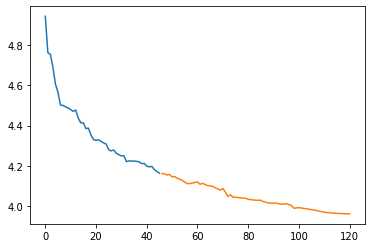

In [10]:
print("Number of halos with mass > 10^13 Msun: ", len(np.unique(halo_table_masked['SubhaloGrNr'])))

halo_table1=halo_table_masked[:int(len(halo_table_masked)/2)]
halo_table2=halo_table_masked[int(len(halo_table_masked)/2):]

halo_array_masked = np.arange(0,len(halo_table_masked))

halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]

plt.plot(halo_table1['SubhaloGrNr'],np.log10(halo_table1['GroupMass']))
plt.plot(halo_table2['SubhaloGrNr'],np.log10(halo_table2['GroupMass']))
print(halo_array1)
print(halo_array2)

In [11]:
import astropy.stats as astats
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope\
#w = 7
#p = 5
def get_slope_sg(xx, yy, num_output, w, p):
    # Savitsky-Golay smoothing
    window_size = w
    poly_order = p
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

def DensityProfileColors(RScale, Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        number_blue=0
        number_red=0
        number_green=0
        if(len(blue_mask_subs) != 0):
            number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        if(len(red_mask_subs) != 0):    
            number_red = len(r_subhalo[mask_sep & red_mask_subs])
        if(len(green_mask_subs) != 0): 
            number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)
    return NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green

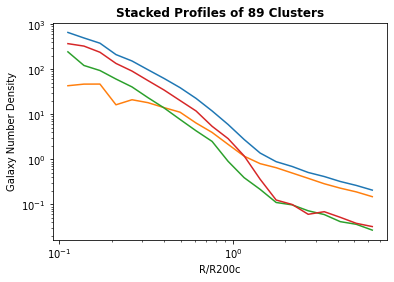

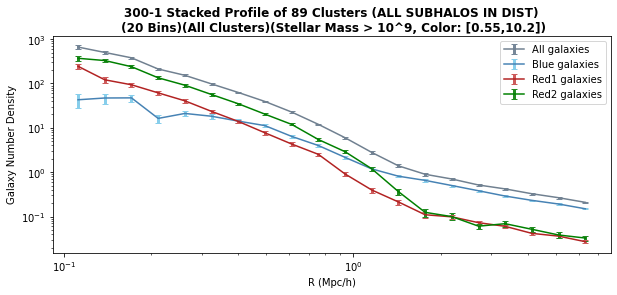

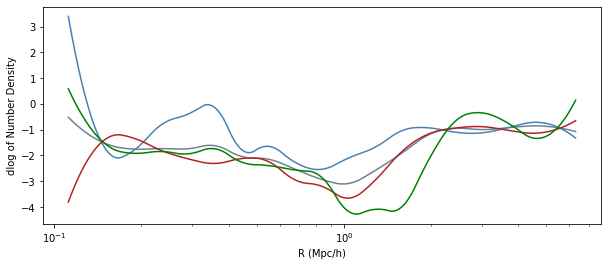

"\n\n# PLOTTING ALL\n# PLOTTING BOOTSTRAPPED STACKED PROFILES\nplt.figure(figsize=(10,4))\nplt.errorbar(bin_stack11, Yi_avg_red11*np.sqrt(bin_stack11), yerr = boot_err_red1*np.sqrt(bin_stack11), c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')\nplt.errorbar(bin_stack11, Yi_avg_green11*np.sqrt(bin_stack11), yerr = boot_err_green1*np.sqrt(bin_stack11), c='lawngreen', ecolor = 'lawngreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')\nplt.errorbar(bin_stack12, Yi_avg_red12*np.sqrt(bin_stack12), yerr = boot_err_red2*np.sqrt(bin_stack12), c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')\nplt.errorbar(bin_stack12, Yi_avg_green12*np.sqrt(bin_stack12), yerr = boot_err_green2*np.sqrt(bin_stack12), c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')\nplt.xscale('log')

In [12]:
'''
my version


h_table - halo_table
sh_table - subhalo_table
appended - were additional subhalos outside a certain radius added to halos?
to_print - whether or not to print halo data
returns - Rscale?
cluster_type - string used in title name
'''
def profile(h_table, sh_table, appended, to_print, cluster_type, w, p, bins, cut):
    t0 = time.time()
    Rmin = 0.1
    Rmax, Halo_Rmax = 7, 7
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    red1_sh_id = []
    red2_sh_id = []
    blue_sh_id = []
    sh_ids = []

    NDensity_list = []
    NDensity_list_b = []
    NDensity_list_r = []
    NDensity_list_g = []
    RScale_list = []
    red1_ratio = []
    red2_ratio = []

    number_red1DF = []
    number_red2DF = []
    red1_submass = []
    red2_submass= []

    
    for i in range(0,len(h_table)):
        #relevant_subhalos = sh_table[sh_table['SubhaloGrNr'] == h_table['SubhaloGrNr'][i]]
        if(to_print):
            print("\nHalo index:", i)
            print("Halo Mass:", h_table['GroupMass'][i])
            if(appended):
                N_subhalos = h_table['GroupNsubs'][i]
                print("N Subhalos from Illustris Algorithm:", N_subhalos)
                
            # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
            R500c = 0.001*scale_factor*h_table['Group_R_Crit500'][i] #ckpc/h to Mpc/h
            R200c = 0.001*scale_factor*h_table['Group_R_Crit200'][i]
            R200m = 0.001*scale_factor*h_table['Group_R_Mean200'][i]
            print("R500c, R200c, R200m:",R500c, R200c, R200m)

        RScale = 0.001*scale_factor*h_table['Group_R_Mean200'][i]
        RScale_list.append(RScale)
        dev = np.array(sh_table['SubhaloPos']-h_table['GroupPos'][i]) 
        
        for ind, q in enumerate(dev.T):
            q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
            dev.T[ind] = q
        r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
        
        # TAKING SUBS IN DISTANCE OF HALO CENTER
        relevant_subhalos = sh_table[r_subhalo_all<=(Halo_Rmax*RScale)]
        r_subhalo_all = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*RScale)]
        
        if(to_print):
            print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(relevant_subhalos))

        # COLOR CUTS
        gmr = relevant_subhalos['SubhaloStellarPhotometrics'][:,4]-relevant_subhalos['SubhaloStellarPhotometrics'][:,5]
        sm = np.log10(relevant_subhalos['StellarMass']*1e10)
        b1,b2 = -0.2, 0.5
        r1, r2 = 0.55, 1.0
        
        blue_mask_subs = (gmr<0.55)
        
        sm1 = 10.2
        color_title = '[%s,%s]' %(r1,sm1)
            
        red_mask_subs = (gmr>r1)&(sm>=sm1)
        green_mask_subs = (gmr>r1)&(sm<sm1)
        
        red1_sh_id.append(np.array(relevant_subhalos['Index'][red_mask_subs]))
        red2_sh_id.append(np.array(relevant_subhalos['Index'][green_mask_subs]))
        blue_sh_id.append(np.array(relevant_subhalos['Index'][blue_mask_subs]))
        
        red1_ratio.extend(((relevant_subhalos['SubhaloMass'][red_mask_subs])/(h_table['GroupMass'][i])).tolist())
        red2_ratio.extend(((relevant_subhalos['SubhaloMass'][green_mask_subs])/(h_table['GroupMass'][i])).tolist())
        red1_submass.extend(relevant_subhalos['SubhaloMass'][red_mask_subs]*1e10)
        red2_submass.extend(relevant_subhalos['SubhaloMass'][green_mask_subs]*1e10)

        NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green= DensityProfileColors(
            RScale, Rmin,Rmax,bins,r_subhalo_all,blue_mask_subs, red_mask_subs,green_mask_subs)    

        if(to_print):
            print("galaxies", galaxies)
            print("blue galaxies counted", galaxies_blue)
            print("red1 galaxies counted", galaxies_red)
            print("red2 galaxies counted", galaxies_green)
        number_red1DF.append(sum(galaxies_red))
        number_red2DF.append(sum(galaxies_green))
        NDensity_list.append(NDensity) #/M200m
        NDensity_list_b.append(NDensity_blue)
        NDensity_list_r.append(NDensity_red)
        NDensity_list_g.append(NDensity_green)
        

    # RADIAL BINS, R_AVG, ETC
    R_avg = np.mean(RScale_list) #Mpc/h
    if(to_print):
        print("R_avg:", R_avg)

    bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
    bin_stack = (bin_divided[1:]+bin_divided[:-1])/2

    # PLOTTING BASIC AVERAGED STACKS
    NDensity_stack = np.mean(NDensity_list, axis=0)
    NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
    NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
    NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
    plt.figure()
    plt.plot(bin_stack, NDensity_stack, '-')
    plt.plot(bin_stack, NDensity_stack_b, '-')
    plt.plot(bin_stack, NDensity_stack_r, '-')
    plt.plot(bin_stack, NDensity_stack_g, '-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density')
    plt.title('Stacked Profiles of %s Clusters' %(len(h_table)), fontweight = 'bold', wrap=True)
    plt.show()

    # BOOTSTRAP PROFILES, ERRORBARS
    Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
    Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
    Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
    Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
    dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000,w,p)  
    dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000,w,p)  
    dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000,w,p)  
    dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000,w,p)  
      
    # PLOTTING BOOTSTRAPPED STACKED PROFILES
    plt.figure(figsize=(10,4))
    '''    
    plt.errorbar(bin_stack, Yi_avg*np.sqrt(RScale), yerr = boot_err*np.sqrt(RScale), c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stack, Yi_avg_blue*np.sqrt(RScale), yerr = boot_err_blue*np.sqrt(RScale), c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stack, Yi_avg_red*np.sqrt(RScale), yerr = boot_err_red*np.sqrt(RScale), c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red1 galaxies')
    plt.errorbar(bin_stack, Yi_avg_green*np.sqrt(RScale), yerr = boot_err_green*np.sqrt(RScale), c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies')
    

    plt.errorbar(bin_stack, Yi_avg*np.sqrt(bin_stack), yerr = boot_err*np.sqrt(bin_stack), c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stack, Yi_avg_blue*np.sqrt(bin_stack), yerr = boot_err_blue*np.sqrt(bin_stack), c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stack, Yi_avg_red*np.sqrt(bin_stack), yerr = boot_err_red*np.sqrt(bin_stack), c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red1 galaxies')
    plt.errorbar(bin_stack, Yi_avg_green*np.sqrt(bin_stack), yerr = boot_err_green*np.sqrt(bin_stack), c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies')
    '''

    plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red1 galaxies')
    plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('Galaxy Number Density')# (scaled by M200m)
    plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(%s)(Stellar Mass > 10^%s, Color: %s)' 
              %(len(h_table), bins, cluster_type ,9, color_title), fontweight = 'bold', wrap=True)
    plt.legend()
    plt.show()

    # SG LOG DERIVATIVE AND PLOT
    plt.figure(figsize = (10,4))
    plt.plot(dlog_data_SG_x, dlog_data_SG_y*np.sqrt(RScale), c = 'slategrey')
    plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b*np.sqrt(RScale), c = 'steelblue')
    plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r*np.sqrt(RScale), c = 'firebrick')
    plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g*np.sqrt(RScale), c = 'green')
    plt.xscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('dlog of Number Density')
    plt.show()
    

    return (red1_sh_id, red2_sh_id, blue_sh_id,number_red1DF, number_red2DF, red1_submass, red2_submass, R_avg, cov, cov_blue, cov_red, cov_green, boot_err_blue, boot_err,
            bin_stack, Yi_avg, Yi_avg_blue, Yi_avg_red, Yi_avg_green, dlog_data_SG_x_r, dlog_data_SG_x_g, dlog_data_SG_y_r, 
            dlog_data_SG_y_g, red1_ratio, red2_ratio, boot_err_red, boot_err_green, NDensity_list, NDensity_list_b, NDensity_list_g, NDensity_list_r)

w,p = 9,5
bins = 20 

red1_sh_id, red2_sh_id, blue_sh_id, number_red1DF, number_red2DF, red1_submass, red2_submass, R_avg, cov, cov_blue, cov_red, cov_green, boot_err_blue, boot_err, bin_stack, Yi_avg, Yi_avg_blue, Yi_avg_red, Yi_avg_green, dlog_data_SG_x_r, dlog_data_SG_x_g, dlog_data_SG_y_r, dlog_data_SG_y_g, red1_ratio, red2_ratio, boot_err_red, boot_err_green, NDensity_list, NDensity_list_b, NDensity_list_g, NDensity_list_r = profile(halo_table_masked, all_galaxies, True, False, "All Clusters", w, p, bins, 'stellarmass')

#bin_stack11, Yi_avg_red11, Yi_avg_green11, dlog_data_SG_x_r1, dlog_data_SG_x_g1, dlog_data_SG_y_r1, dlog_data_SG_y_g1, red1_ratio1, \
#red2_ratio1, boot_err_red1, boot_err_green1, NDensity_list_1, NDensity_list_b_1, NDensity_list_g_1, NDensity_list_r_1 = profile(halo_table1, all_galaxies, False, False, "Lower Mass Clusters", w, p, bins, 'subhalomass')

#bin_stack12, Yi_avg_red12, Yi_avg_green12, dlog_data_SG_x_r2, dlog_data_SG_x_g2, dlog_data_SG_y_r2, dlog_data_SG_y_g2, red1_ratio2, \
#red2_ratio2, boot_err_red2, boot_err_green2, NDensity_list_2, NDensity_list_b_2, NDensity_list_g_2, NDensity_list_r_2 = profile(halo_table2, all_galaxies, False, False, "Higher Mass Clusters", w, p, bins, 'subhalomass')

'''

# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg_red11*np.sqrt(bin_stack11), yerr = boot_err_red1*np.sqrt(bin_stack11), c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack11, Yi_avg_green11*np.sqrt(bin_stack11), yerr = boot_err_green1*np.sqrt(bin_stack11), c='lawngreen', ecolor = 'lawngreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack12, Yi_avg_red12*np.sqrt(bin_stack12), yerr = boot_err_red2*np.sqrt(bin_stack12), c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stack12, Yi_avg_green12*np.sqrt(bin_stack12), yerr = boot_err_green2*np.sqrt(bin_stack12), c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test: Stacked Profiles of Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Stellar Mass > 10^%s))' %(bins, 7.5), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'lawngreen',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'indianred')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'forestgreen')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)


# Dynamical Friction Histograms
plt.figure()
plt.hist(np.log10(red2_ratio1), bins=30, label = 'Red2 - low', density=True, stacked=True, color='lawngreen', histtype='step')
plt.hist(np.log10(red1_ratio1), bins=30, label = 'Red1 - low',density=True,stacked=True,color='firebrick', histtype='step')
plt.hist(np.log10(red2_ratio2), bins=30, label = 'Red2 - high', density=True, stacked=True, color='forestgreen', histtype='step')
plt.hist(np.log10(red1_ratio2), bins=30, label = 'Red1 - high',density=True,stacked=True,color='indianred', histtype='step')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s))' %(7.5))
plt.legend()

plt.figure()
plt.hist(np.log10(red2_ratio1), bins=30, label = 'Red2 - low', density=False, stacked=True, color = 'lawngreen', histtype='step')
plt.hist(np.log10(red1_ratio1), bins=30, label = 'Red1 - low',density=False,stacked=True, color='firebrick', histtype='step')
plt.hist(np.log10(red2_ratio2), bins=30, label = 'Red2 - high', density=False, stacked=True, color = 'forestgreen', histtype='step')
plt.hist(np.log10(red1_ratio2), bins=30, label = 'Red1 - high',density=False,stacked=True, color='indianred', histtype='step')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Count')
plt.title('Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s)' %(7.5))
plt.legend()
'''


In [ ]:
# PROFILE FITTING FUNCTIONS
import emcee
import scipy

r_0 = 1.5 # Fix r_0 to 1.5 Mpc/h
#rho_g= 0.027543187127290668 #(Mpc/h)^-3
rho_g= 0.026943079757983778
rho_g_b= 0.021698698509888134
rho_g_r= 0.0029584016482639545
rho_g_g= 0.0022859795998316913
# Define halo profile model

def rho_DK14(theta, r, rho_g_i):
    """
    Definition of halo profile model from Diemer Kravstov 2014
    r_s, r_t, r must all be in units of kpc/h
    """
    
    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
   
    def rho_inner(r):
        exp_arg = -2/alpha*(((r/r_s)**alpha)-1)
        return rho_s*np.exp(exp_arg)

    def rho_outer(r):
        return rho_0*((r/r_0)**(-s_e)) + rho_g_i

    def f_trans(r):
        return (1+(r/r_t)**beta)**(-gamma/beta)
    
    return rho_inner(r)*f_trans(r)+rho_outer(r)

    
def ln_like3d(theta,  r_data, rho_data, cov, rho_g_i):
    """
    Definition of log-likelihood using DK14 moel
    """
    
    rho_thr = rho_DK14(theta, r_data, rho_g_i)
    diff = rho_data-rho_thr
    
    likelihood = -1/2 * np.dot(diff, np.linalg.solve(cov, diff))
    
    if (np.isnan(likelihood)==True):
        return -np.inf

    return likelihood


def ln_prior(theta):
    """
    Definition of parameter priors
    """

    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
    
    # Top hat prior on r_s, r_t, s_e
    #r_s_check = (r_s > 0.01) & (r_s < 5)#(r_s > 0.1) & (r_s < 5000) #Blues #most stuff before Blues run with .01
    r_s_check = (r_s > 0.01) & (r_s < 5000) #FOR BLUES PROFILES
    r_t_check = (r_t > 0.01) & (r_t < 50)
    s_e_check = (s_e > 0.01) & (s_e < 100)

    rho_s_check =(rho_s >= 0.0001) & (rho_s < 5000)
    #rho_s_check = True
    rho_0_check = True

    flat_prior_check = r_s_check & r_t_check & s_e_check & rho_s_check & rho_0_check 
    
    if not flat_prior_check:
        return -np.inf

    return  -0.5*(lg_alpha - np.log10(0.19))**2/0.2**2 - 0.5*(lg_beta - np.log10(6.0))**2/0.6**2 - 0.5*(lg_gamma - np.log10(4.0))**2/0.6**2
    

def ln_prob3d(theta, r, rho, cov, rho_g_i):
    """
    Total probability definition (likelihood+prior)
    """
    lp = ln_prior(theta)
    
    if not np.isfinite(lp):
        return -np.inf

    return lp+ln_like3d(theta, r, rho, cov, rho_g_i)


def main(p0,n_walkers,n_iter,n_dim,n_burn,ln_prob, data):
    sampler = emcee.EnsembleSampler(n_walkers, n_dim, ln_prob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, n_burn, progress=True)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, n_iter, progress=True)

    return sampler, pos, prob, state

def MCMC(averaged_r_tot, profiles, covs,rho_g_list,init_theta, bounds, n_burn, n_walkers, n_iter):
    labels = [r'$\log(\alpha)$', r'$\log(\beta)$', r'$\log(\gamma)$', r'$\log(r_s)$', r'$\log(r_t)$', r'$\log(\rho_s)$', r'$\log(\rho_0)$', r'$s_e$']
    best_fit_mcmc_list = []#[best_fit_mcmc, best_fit_mcmc_blue, best_fit_mcmc_red, best_fit_mcmc_green]
    samples_list = []
    #rho_g_list = [0.026943079757983778, 0.021698698509888134, 0.0029584016482639545, 0.0022859795998316913]
    for i in range(len(profiles)):
        averaged_r_tot = averaged_r_tot #in Mpc/h
        averaged_rho_tot = profiles[i] #- rho_g_list[i]#Yi_avg1
        rho_g_i = rho_g_list[i]
        cov = covs[i]

        # Fit TNG_300-1 Profiles
        data = [averaged_r_tot, averaged_rho_tot, cov,rho_g_i]
        args = (averaged_r_tot, averaged_rho_tot, cov,rho_g_i)
        # Set initial guess and boundaries and use minimization to determine start position of MCMC chain
        #lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
        #init_theta = np.array([-0.50257944, 0.58536, 0.90564052,  -0.5, 0.35784823, 13.8549328, 8.051313892 , 1.30773031])
        #init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2.7, -.3 , 1.66])
        ndim = 8 #number of free parameters
        neg_ll3d = lambda *args: -ln_like3d(*args)

        res = scipy.optimize.minimize(neg_ll3d, init_theta, args=args, method='SLSQP', options = {'maxiter':500}, bounds=bounds)

        # Run MCMC
        n_burn = n_burn#10000#500?? or 1000
        n_dim, n_walkers = 8, n_walkers#128#128 #increasing walkers from 500 to 1000 seemed to help, maybe return n_iter and n_burn to lower values
        n_iter = n_iter#5000
        # WORKED with 5000,8,200,10000. pretty good with 1000 for burn. 
        # BEST is 10000,8,128,5000 takes 280 seconds for main part 
        p0 = [res.x + 1e-3*np.random.randn(n_dim) for i in range(n_walkers)]
        sampler, pos, prob, state = main(p0, n_walkers, n_iter, n_dim, n_burn,ln_prob3d, data)
        samples = sampler.flatchain
        corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84], show_titles=True);
        samples_list.append(samples)
        best_fit_mcmc_list.append(samples[np.argmax(sampler.flatlnprobability)])

    print('done MCMC')
    return best_fit_mcmc_list, samples

def FittedPlots(best_fit_mcmc_list_DF, profiles, averaged_r_tot,covs,rho_g_list,labels, colors, ls_list):
    plt.figure(figsize=(10,13))#(20,28))
    ax0 = plt.subplot(3,1,1)
    ax1 = plt.subplot(3,1,2)
    ax2 = plt.subplot(3,1,3)
    plt.tight_layout()
    halo_masses = []
    for h_i in range(0,len(halo_table)):
        halo_masses.append(halo_grp['GroupMass'][h_i]*1e10)
    r_sp_list = []
    bins = 20
    for i in range(len(colors)):
        best_fit_mcmc = best_fit_mcmc_list_DF[i]
        averaged_rho_tot = profiles[i]
        r_thr = np.logspace(np.log10(np.min(averaged_r_tot)), np.log10(np.max(averaged_r_tot)), 3000)

        log_deriv_mcmc = r_thr/rho_DK14(best_fit_mcmc,r_thr, rho_g_list[i])*np.gradient(rho_DK14(best_fit_mcmc,r_thr, rho_g_list[i]), r_thr)

        r_sp = r_thr[np.argmin(log_deriv_mcmc)]
        r_sp_list.append(r_sp)
        #plt.subplot(3,1,1)
        
        bins0 = np.logspace(np.min(np.log10(halo_masses)), 
                           np.max(np.log10(halo_masses)), 30)

        ax0.hist(halo_masses, bins=bins0, color = 'cadetblue')
        title_str = r"Mass Distribution of %s Clusters ($\overline{m}$= " % (len(halo_table))
        title_str += ("{:.3E} $M\odot$)").format(np.mean(halo_masses))
        ax0.set_title(title_str+' (Minimum = 5*10$^{13}$)', fontweight="bold")
        ax0.set_xlabel(r"Cluster Mass ($M_{\odot}$)")
        ax0.set_ylabel("Count")
        ax0.set_xscale("log")
        ax0.set_yscale("log")

        
        #plt.subplot(3,1,2)
        ax1.plot(r_thr, rho_DK14(best_fit_mcmc, r_thr, rho_g_list[i]), color=colors[i], linestyle=ls_list[i] 
                 , label="Model Fit %s" %(labels[i]))
        ax1.errorbar(averaged_r_tot, averaged_rho_tot, 
                     yerr=np.sqrt(np.diag(covs[i])), 
                     marker = '.', color = colors[i], linestyle = "none",
                     markersize = 5, ecolor = colors[i], elinewidth = 1, capsize=2, 
                     markeredgewidth=1, label="Data %s" %(labels[i]))
        #plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategray', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
        ax1.axvline(r_sp, linestyle=ls_list[i], color=colors[i])
        ax1.legend(frameon=False, loc="upper right")
        ax1.set_title("300-1 Galaxy Number Density Profiles (Subhalos > 10$^{%s}$, Bins = %s)" %(9,bins), fontweight="bold")
        ax1.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
        ax1.set_ylabel(r"$\rho$ [$M_{\odot}h^3$Mpc$^{-3}$]")
        ax1.set_xscale("log")
        ax1.set_yscale("log")
        ax1.set_xlim(0.1, 3) #2


        #plt.subplot(3,1,3)
        ax2.plot(r_thr, log_deriv_mcmc, label='Rsp = %s' %(r_sp), color=colors[i], linestyle=ls_list[i])
        ax2.axvline(r_sp, linestyle=ls_list[i], color=colors[i])
        ax2.set_xscale("log")
        ax2.set_title("Log Derivatives of Model Fits", fontweight="bold", color="k")
        ax2.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
        ax2.set_ylabel(r"$d\log \rho / d \log r$")
        ax2.set_xlim(0.1, 3)#2
        ax2.set_ylim(-4.5, -0.5)
        ax2.legend(frameon=False, loc="lower right")

    plt.tight_layout()
    plt.show()
    return r_sp_list



In [ ]:
'''
return (sh_ids,number_red1DF, number_red2DF, red1_submass, red2_submass, R_avg, cov, cov_blue, cov_red, cov_green, boot_err_blue, boot_err,
            bin_stack, Yi_avg, Yi_avg_blue, Yi_avg_red, Yi_avg_green, dlog_data_SG_x_r, dlog_data_SG_x_g, dlog_data_SG_y_r, 
            dlog_data_SG_y_g, red1_ratio, red2_ratio, boot_err_red, boot_err_green, NDensity_list, NDensity_list_b, NDensity_list_g, NDensity_list_r)
'''

t0 = time.time()

import corner

profiles = [Yi_avg, Yi_avg_blue, Yi_avg_red,Yi_avg_green]
covs = [cov, cov_blue, cov_red,cov_green]


init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2, 3 , 1.66])
bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-2, 0.7), (-2, 0.7), (-1, 30), (-1, 30), (.1, 10))
rho_g_list = [0.026943079757983778, 0.021698698509888134, 0.0029584016482639545, 0.0022859795998316913]

best_fit_mcmc_list, samples = MCMC(bin_stack, profiles, covs,rho_g_list,init_theta, bounds, 10000, 128, 5000)    
#change priors on p_s to less? change priors on r_s a little?
print(time.time() - t0)



In [ ]:
# MCMC FITTING COLOR SPLIT PROFILES
colors = ['dimgray','steelblue','firebrick','#fa5f1b']
labels = ['All','Blue','Red1','Red2']
ls_list = ['-','-','-','-']
averaged_r_tot = bin_stack
r_sp_list = FittedPlots(best_fit_mcmc_list, profiles, averaged_r_tot,covs,rho_g_list,labels, colors, ls_list)

In [ ]:
'''
# REFINED COLOR CUTS MCMC RUN
t0 = time.time()

#import corner
rho_g_list = [0.06312296296296296,0.5611757037037037, 0.006139259259259259, 0.20856414814814814]
profiles = [Yi_avgR, Yi_avg_blueR, Yi_avg_redR,Yi_avg_greenR]
covs = [covR, cov_blueR, cov_redR,cov_greenR]


init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2, 3 , 1.66])
bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-2, 0.7), (-2, 0.7), (-1, 30), (-1, 30), (.1, 10))
#NEED TO PUT IN CORRECT RHO_G_LIST
best_fit_mcmc_listR, samplesR = MCMC(bin_stackR, profiles, covs,rho_g_list,init_theta, bounds, 10000, 128, 5000) 
print(time.time()-t0)

#REFINED
profiles = [Yi_avgR, Yi_avg_blueR, Yi_avg_redR,Yi_avg_greenR]
covs = [covR, cov_blueR, cov_redR,cov_greenR]
averaged_r_tot = bin_stackR
r_sp_list = FittedPlots(best_fit_mcmc_listR, profiles, averaged_r_tot,covs,rho_g_list,labels, colors, ls_list)
'''


In [16]:
# CHOOSE WHAT SUBHALO SPLIT:
halo_table1= np.arange(0,int(len(halo_table['GroupMass'])/2))
halo_table2=np.arange(int(len(halo_table['GroupMass'])/2+1),int(len(halo_table['GroupMass'])))

mass_cut = 'subhalomass'
bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, Yi_avg_redDF,\
cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, red1_ratioDF, red2_ratioDF,\
number_red1DF, number_red2DF, red1_submass, red2_submass, R_avgDF, color_titleDF  = ColorProfiles(all_galaxies, all_galaxies['SubhaloPos'],halo_table1,'basic','stellarmass')

bin_stackDF2, Yi_avgDF2, covDF2, boot_errDF2, Yi_avg_blueDF2, cov_blueDF2, boot_err_blueDF2, Yi_avg_redDF2, cov_redDF2, boot_err_redDF2, Yi_avg_greenDF2, cov_greenDF2, boot_err_greenDF2, red1_ratioDF2, red2_ratioDF2, number_red1DF2, number_red2DF2, red1_submass2, red2_submass2, R_avgDF2, color_titleDF2  = ColorProfiles(all_galaxies, all_galaxies['SubhaloPos'],halo_table2,'basic','stellarmass')

R_AVG = (R_avgDF+R_avgDF2)/2


# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_redDF2, yerr = boot_err_redDF2, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_greenDF2, yerr = boot_err_greenDF2, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h) (Based on avg R200m of all 316 clusters)')#('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
if mass_cut == 'subhalomass':
    plt.title('100-1 Dynamical Friction Test with Subhalomass Split at 11.1: \nStacked Profiles of Clusters (20 Bins)(Stellar Mass > 10^7.8))', fontweight = 'bold', wrap=True)
elif mass_cut == 'stellarmass':
    plt.title('100-1 Dynamical Friction Test with Stellar Mass Split at 10.2 (Red1 and Red2): \nStacked Profiles of Clusters (20 Bins)(Stellar Mass > 10^7.8))', fontweight = 'bold', wrap=True)    
plt.legend()

NameError: name 'ColorProfiles' is not defined

In [ ]:
t0 = time.time()
import corner
labels = [r'$\log(\alpha)$', r'$\log(\beta)$', r'$\log(\gamma)$', r'$\log(r_s)$', r'$\log(r_t)$', r'$\log(\rho_s)$', r'$\log(\rho_0)$', r'$s_e$']
profiles = [Yi_avg_redDF,Yi_avg_greenDF,Yi_avg_redDF2,Yi_avg_greenDF2]
covs = [cov_redDF,cov_greenDF,cov_redDF2,cov_greenDF2]
init_theta = np.array([-0.5, 0.78, 0.60, -0.61, 0.1, 2, -0.5 , 0.66])
bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-1, 0.7), (-1, 0.7), (-1, 30), (-1, 30), (.1, 10))
rho_g_listDF = [rho_g_r,rho_g_g,rho_g_r,rho_g_g]
best_fit_mcmc_list_DF, samples = MCMC((R_AVG/R_avgDF)*bin_stackDF, profiles, covs,rho_g_listDF, init_theta, bounds, 10000, 128, 5000)
print(time.time() - t0)

In [ ]:
colors = ['firebrick','#fa5f1b','firebrick','#fa5f1b']
labels = ['Red1-low','Red2-low','Red1-high','Red2-high']
ls_list = ['--','--','-','-']
profiles = [Yi_avg_redDF,Yi_avg_greenDF,Yi_avg_redDF2,Yi_avg_greenDF2]
averaged_r_tot = (R_AVG/R_avgDF)*bin_stackDF
covs = [cov_redDF,cov_greenDF,cov_redDF2,cov_greenDF2]

r_sp_list = FittedPlots(best_fit_mcmc_list_DF, profiles, averaged_r_tot,covs,rho_g_listDF,labels, colors, ls_list)


plt.figure()
plt.hist(np.log10(red2_ratioDF), bins=50, label = 'Red2 - low', density=True, stacked=True, color='tab:orange', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red1_ratioDF), bins=50, label = 'Red1 - low',density=True,stacked=True,color='firebrick', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red2_ratioDF2), bins=50, label = 'Red2 - high', density=True, stacked=True, color='tab:orange', histtype='step', lw = 1.5)
plt.hist(np.log10(red1_ratioDF2), bins=50, label = 'Red1 - high',density=True,stacked=True,color='firebrick', histtype='step', lw = 1.5)
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio \n(Stellar Mass > 10^7.8))')
plt.legend()
plt.show()

In [ ]:
plt.hist(np.log10(red2_ratioDF), bins = 25)
plt.show()
plt.hist(np.log10(red2_ratioDF2), bins = 25)
plt.show()


In [ ]:
print(len(satellites_blue))
mag = satellites_blue['SubhaloStellarPhotometrics']
gmr = mag[:,4]-mag[:,5]
print(len(satellites_blue[gmr<0.35]))
print(len(satellites_blue[gmr>0.35]))
print(len(satellites_blue[gmr<0.55]))
print(len(satellites_green))


In [ ]:
def DensityProfileBlues(RScale,Rmin,Rmax,bins,r_subhalo,blue_mask_subs1,blue_mask_subs2):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue1 = []
    NDensity_blue2 = []
    
    galaxies = []
    galaxies_blue1 = []
    galaxies_blue2 = []
    
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue1 = len(r_subhalo[mask_sep & blue_mask_subs1])
        number_blue2 = len(r_subhalo[mask_sep & blue_mask_subs2])

        NDensity_blue1.append(number_blue1/volume)
        NDensity_blue2.append(number_blue2/volume)
        galaxies_blue1.append(number_blue1)
        galaxies_blue2.append(number_blue2)
    return NDensity, NDensity_blue1, NDensity_blue2, galaxies, galaxies_blue1, galaxies_blue2
def BlueProfiles(Halo_Array,color_cut, CM_coords, subhalo_table_m):
    w = 9
    p=5
    bins = 20#30#15
    Rmin = .1
    Rmax = 7#5.5 # for R200c#7
    Halo_Rmax = 7
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    NDensity_listDF = []
    NDensity_list_b1DF = []
    NDensity_list_b2DF = []
    ND_bootDF = []
    ND_boot_b1DF = []
    ND_boot_b2DF = []
    RScale_listDF = []

    for h_i1 in range(0,len(Halo_Array)):
        #print("\nHalo:", h_i1)
        #print("Halo Mass:", halo_grp['GroupMass'][h_i1])
        N_subhalos = halo_grp['GroupNsubs'][h_i1]
        #print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)

        # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
        R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
        R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
        R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
        #M200m = halo_grp['Group_M_Mean200'][h_i]
        #print("R500c, R200c, R200m:",R500c, R200c, R200m)
        RScale = R200m
        RScale_listDF.append(RScale)
        #print('Rscale',RScale)
        CM_halo = halo_grp['GroupPos'][h_i1]
        dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
        #print('before dev loop:',time.time()-t0)
        for ind, q in enumerate(dev.T):
            q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
            dev.T[ind] = q
        r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
        #print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
        # TAKING SUBS IN DISTANCE OF HALO CENTER
        r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
        subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
        #print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)

        # COLOR CUTS
        mag = subhalo_table_hi['SubhaloStellarPhotometrics']
        gmr = mag[:,4]-mag[:,5]
        rmz = mag[:,5]-mag[:,7]
        b1 = -.2#.2
        b2 = 0.50#.59#.734
        r1 = 0.55#.6#.735
        r2 = 1.#1.

        if color_cut == 'basic':
            blue_mask_subs2 = (gmr<0.55)&(gmr>=0.3)#(gmr<0.53)
            blue_mask_subs1 = (gmr<0.3)#(gmr<0.53)
            color_title = 'Blues (g-r 0.25, 0.55)'
        NDensity, NDensity_blue1, NDensity_blue2, galaxies, galaxies_blue1, galaxies_blue2 = DensityProfileBlues(RScale, Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs1,blue_mask_subs2)    

        #print("galaxies", galaxies)
        #print("blue1 galaxies counted", galaxies_blue1)
        #print("blue2 galaxies counted", galaxies_blue2)
        
        #print("sum of galaxies:", sum(galaxies))

        NDensity_listDF.append(NDensity) #/M200m
        NDensity_list_b1DF.append(NDensity_blue1)
        NDensity_list_b2DF.append(NDensity_blue2)


    # RADIAL BINS, R_AVG, ETC
    R_avgDF = np.mean(RScale_listDF) #Mpc/h
    #print("R_avg:", R_avgDF)
    bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
    bin_stackDF = R_avgDF*(bin_divided[1:]+bin_divided[:-1])/2

    # BOOTSTRAP PROFILES, ERRORBARS
    Yi_avgDF, covDF, boot_errDF = Bootstrap_Covariance(NDensity_listDF, 300, bins)
    Yi_avg_blue1DF, cov_blue1DF, boot_err_blue1DF = Bootstrap_Covariance(NDensity_list_b1DF, 300, bins)
    Yi_avg_blue2DF, cov_blue2DF, boot_err_blue2DF = Bootstrap_Covariance(NDensity_list_b2DF, 300, bins)
    dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stackDF, (Yi_avgDF), 1000,w,p)  
    dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stackDF, (Yi_avg_blue1DF), 1000,w,p)  
    dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg(bin_stackDF, (Yi_avg_blue2DF), 1000,w,p)  

    #print("Time:",time.time()-t0)         
    # PLOTTING BOOTSTRAPPED STACKED PROFILES
    plt.figure(figsize=(10,4))
    plt.errorbar(bin_stackDF, Yi_avgDF, yerr = boot_errDF, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_blue1DF, yerr = boot_err_blue1DF, c = 'steelblue',ecolor = 'steelblue', elinewidth = 3, capsize=3, label = 'Blue1 galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_blue2DF, yerr = boot_err_blue2DF, c='royalblue', ecolor = 'royalblue', elinewidth = 3, capsize=3, label = 'Blue2 galaxies')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('Galaxy Number Density')# (scaled by M200m)
    plt.title('100-1 Stacked Profile of %s Clusters\n (%s Bins)(Stellar Mass > 10^7.8, Color: %s)' %(len(halo_table), bins, color_title), fontweight = 'bold', wrap=True)
    plt.legend()

    # SG LOG DERIVATIVE AND PLOT
    plt.figure(figsize = (10,4))
    plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
    plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
    plt.plot(dlog_data_SG_x_b2, dlog_data_SG_y_b2, c = 'royalblue')
    plt.xscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('dlog of Number Density')
    plt.show()
    
    return bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blue1DF, cov_blue1DF, boot_err_blue1DF, Yi_avg_blue2DF, cov_blue2DF, boot_err_blue2DF, R_avgDF, color_title


In [ ]:
bin_stackB, Yi_avgB, covB, boot_errB, Yi_avg_blue1B, cov_blue1B, boot_err_blue1B, Yi_avg_blue2B, cov_blue2B, boot_err_blue2B, R_avgB, color_titleB = BlueProfiles(halo_table[0:178],'basic', all_galaxies['SubhaloPos'], all_galaxies)

In [ ]:
boxsize = header['BoxSize'] #kpc/h
print(len(satellites_blue))
Nsubs = len(satellites_blue)
rho_g = Nsubs/(boxsize*.001)**3
print('rho_g=',rho_g)


Nsubs_b1 = len((satellites_blue)[((satellites_blue['SubhaloStellarPhotometrics'][:,4]-satellites_blue['SubhaloStellarPhotometrics'][:,5]) < 0.3)])
rho_g_b1 = Nsubs_b1/(boxsize*.001)**3
print('rho_g_b1=',rho_g_b1)
Nsubs_b2 = len((satellites_blue)[((satellites_blue['SubhaloStellarPhotometrics'][:,4]-satellites_blue['SubhaloStellarPhotometrics'][:,5]) >= 0.3) & ((satellites_blue['SubhaloStellarPhotometrics'][:,4]-satellites_blue['SubhaloStellarPhotometrics'][:,5]) < 0.55)])
rho_g_b2 = Nsubs_b2/(boxsize*.001)**3
print('rho_g_b2=',rho_g_b2)
rho_g_listB = [rho_g, rho_g_b1, rho_g_b2]

In [ ]:
t0 = time.time()
profiles = [Yi_avgB,Yi_avg_blue1B,Yi_avg_blue2B]
import corner
#profiles = [Yi_avg_blue1B]

covs = [covB,cov_blue1B,cov_blue2B]
#covs = [cov_blue1B]

init_theta = np.array([-0.92, 0.78, 0.60, 1.5, 0.34, 2, 3 , 1.66])
bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (.3, 3), (-1, 0.7), (-1, 30), (-1, 30), (.1, 10))
#rho_g_listB = []
best_fit_mcmc_listB, samples = MCMC(bin_stackB, profiles, covs, rho_g_listB, init_theta, bounds, 15000, 256, 5000)    
print(time.time()-t0)

"""
profiles = [Yi_avg_redDF,Yi_avg_greenDF,Yi_avg_redDF2,Yi_avg_greenDF2]
covs = [cov_redDF,cov_greenDF,cov_redDF2,cov_greenDF2]
init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2, 3 , 1.66])
bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-1, 0.7), (-1, 0.7), (-1, 30), (-1, 30), (.1, 10))
rho_g_listDF = [rho_g_r,rho_g_g,rho_g_r,rho_g_g]
best_fit_mcmc_list_DF, samples = MCMC((R_AVG/R_avgDF)*bin_stackDF, profiles, covs,rho_g_listDF, init_theta, bounds, 10000, 128, 5000)
print(time.time() - t0)"""

In [ ]:
colors = ['slategray','steelblue','royalblue']
labels = ['All','Blue1 (lower g-r)','Blue2 (higher g-r)']
ls_list = ['-','-','-','-']
profiles = [Yi_avgB,Yi_avg_blue1B,Yi_avg_blue2B]
averaged_r_tot = bin_stackB
covs = [covB,cov_blue1B,cov_blue2B]


#profiles = [Yi_avg_blue1B]
#covs = [cov_blue1B]
#colors = ['steelblue']
#labels = ['Blue1 (lower g-r)']
#ls_list = ['-']

r_sp_list = FittedPlots(best_fit_mcmc_listB, profiles, averaged_r_tot,covs,rho_g_listB,labels, colors, ls_list)

# Color and Phase Space Plots

In [15]:
red1_ids = list(set().union(*red1_sh_id))
red2_ids = list(set().union(*red2_sh_id))
blue_ids = list(set().union(*blue_sh_id))

satellites_red = all_galaxies[np.isin(all_galaxies['Index'],red1_ids)]
satellites_green = all_galaxies[np.isin(all_galaxies['Index'], red2_ids)]
satellites_blue = all_galaxies[np.isin(all_galaxies['Index'], blue_ids)]

if(len(to_add_now)!=0):
    to_add_now['IsCentral']==False
    to_add_now['SubhaloGrNr'] = np.ones(len(to_add_now))*centrals['SubhaloGrNr'][i]
    for k in range(0,len(halo_keys)):
        to_add_now[halo_keys[k]] = [centrals[halo_keys[k]][i]]*len(to_add_now)
    for j in range(0, len(to_add_now)):
        satellites.add_row(to_add_now[j])
        to_add = to_add[to_add['Index']!=to_add_now['Index'][j]]
        if(len(to_add)==0):
            break

print(len(satellites_red))

NameError: name 'to_add_now' is not defined

In [ ]:
def plot_all_bands(table):
    subhalomass = np.array(np.log10(table["SubhaloMassInHalfRad"]*1e10))
    mask = subhalomass > 10.3
    st = table[mask]
    fig, ax = plt.subplots(4,2)
    fig.set_size_inches(16,20)
    plt.subplots_adjust(hspace = 0.5)
    band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
    for bands in range(8):
        mag = st['SubhaloStellarPhotometrics'][:,bands]
        ax[bands%4][bands//4].hist(mag, bins=50)
        ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
        ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)
    plt.show()

In [ ]:
def mass_vs_gmr(table, table_name, mass_type):
    #Recreating Figure 3 from https://arxiv.org/pdf/1707.03395.pdf
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    mass = np.array(np.log10(table[mass_type]*1e10))
    plt.ylabel("$\mathrm{g-r}$", fontsize = 16)
    plt.xlabel("Mass", fontsize = 16)
    plt.title(table_name, fontsize = 16)
    #heights, mass_bins, mag_bins = np.histogram2d(mass, mag, bins=50)
    #plt.contour(mass_bins[0:50],mag_bins[0:50], heights, colors=['red','orange','pink','green'])
    plt.hist2d(mass, mag, bins=50, cmap='viridis', cmin=0.1) #, range=[[9,12], [0,1]])
    plt.show()

In [ ]:
def formation_rate_vs_gmr(table, table_name):
    #table = table[table['SubhaloSFR']>0]
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    plt.figure(figsize=(8,6))
    mass = table['SubhaloSFR']
    plt.xlabel("$\mathrm{g-r}$", fontsize = 14)
    plt.ylabel("Stellar Formation Rate: Msun/yr", fontsize = 14)
    plt.title(table_name, fontsize=16)
    plt.scatter(mag, mass, s=1)#, bins=50, cmap='viridis', cmin=0.1) # range=[[0,0.9], [0,0.8]])
    plt.colorbar()
    plt.show()

In [ ]:
def metallicity_vs_gmr(table, table_name):
    table = table[table['SubhaloSFR']>0]
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    plt.figure(figsize=(8,6))
    metallicity = table['SubhaloStarMetallicity']
    plt.xlabel("$\mathrm{g-r}$", fontsize = 14)
    plt.ylabel("Mass-weighted average metallicity", fontsize = 14)
    plt.title(table_name, fontsize=16)
    plt.hist2d(mag, metallicity, bins=50, cmap='viridis', range=[[0,0.9], [0,0.08]], cmin=0.1)
    plt.colorbar()
    plt.show()

In [ ]:
def formation_rate_vs_mass(table, table_name, mass_type):
    table = table[table['SubhaloSFR']>0]
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    #table = table[mag<0.55] #mag cut 
    mass = np.array(np.log10(table[mass_type]*1e10))
    plt.figure(figsize=(8,6))
    sfr = table['SubhaloSFR']
    plt.xlabel("Mass", fontsize = 14)
    plt.ylabel("Stellar Formation Rate: Msun/yr", fontsize = 14)
    plt.title(table_name, fontsize=16)
    plt.scatter(mass, sfr, s=1)#, cmap='viridis', cmin=0.1, range=[[8,12.5],[0,10]])
    plt.colorbar()
    plt.show()

In [ ]:
def hydrogen_rate_vs_gmr(table, table_name):
    table = table[table['SubhaloStarMetalFractions'][:,0]>0]
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    plt.figure(figsize=(8,6))
    plt.xlabel("$\mathrm{g-r}$", fontsize = 14)
    plt.ylabel("Hydrogen Abundance", fontsize = 14)
    plt.title(table_name, fontsize=16)
    plt.hist2d(mag, table['SubhaloStarMetalFractions'][:,0], bins=50, cmap='viridis', cmin=0.1) #, range=[[0,0.9], [0.6,0.9]])
    plt.colorbar()
    plt.show()

In [ ]:
def helium_rate_vs_gmr(table, table_name):
    table = table[table['SubhaloStarMetalFractions'][:,1]>0]
    mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
    plt.figure(figsize=(8,6))
    plt.xlabel("$\mathrm{g-r}$", fontsize = 14)
    plt.ylabel("Helium Abundance", fontsize = 14)
    plt.title(table_name, fontsize=16)
    plt.hist2d(mag, table['SubhaloStarMetalFractions'][:,1], bins=50, cmap='viridis', cmin=0.1) #, range=[[0,0.9], [0.6,0.9]])
    plt.colorbar()
    plt.show()

In [ ]:
def element_rate_vs_mass(table, table_name, mass_type):
    elements = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'Fe']
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(16,16)
    for i in range (0, len(elements)):
        mass = np.array(np.log10(table[mass_type]*1e10))
        ax[i//3][i%3].set_xlabel("Mass: " + str(mass_type), fontsize = 11)
        ax[i//3][i%3].set_ylabel(elements[i] + " Abundance", fontsize = 11)
        ax[i//3][i%3].set_title(elements[i] + " in " + table_name, fontsize=12)
        ax[i//3][i%3].hist2d(mass, table['SubhaloStarMetalFractions'][:,i], bins=50, cmap='viridis', cmin=0.1)

In [ ]:
def element_rate_vs_gmr(table, table_name):
    elements = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'Fe']
    for i in range (0, len(elements)):
        #table = table[table['SubhaloStarMetalFractions']>0]
        mag = table['SubhaloStellarPhotometrics'][:,4] - table['SubhaloStellarPhotometrics'][:,5]
        plt.figure(figsize=(6,4))
        plt.xlabel("$\mathrm{g-r}$", fontsize = 11)
        plt.ylabel(elements[i] + " Abundance", fontsize = 11)
        plt.title(elements[i] + " in " + table_name, fontsize=12)
        plt.hist2d(mag, table['SubhaloStarMetalFractions'][:,i], bins=50, cmap='viridis', cmin=0.1) 
        plt.colorbar()
        plt.show()

In [ ]:
def gmr_mass_bins_hist(table, table_name, mass_type):
    bins = [9.0,9.5,10.0,10.5,11.0,11.5,12.0]
    fig, ax = plt.subplots(2,3)
    fig.set_size_inches(18,11)
    for i in range(0,6):
        s1 = cut_mass_high(table, mass_type, bins[i])
        s2 = cut_mass_low(table, mass_type, bins[i+1])
        mask2 = np.array(np.log10(s1[mass_type]*1e10)) < bins[i+1]
        s2 = s1[mask2]
        mag = s2['SubhaloStellarPhotometrics'][:,4] - s2['SubhaloStellarPhotometrics'][:,5]
        ax[i//3][i%3].hist(mag, bins=50) #, density=True)
        ax[i//3][i%3].set_title("Mass bin: "+str(bins[i])+"-"+str(bins[i+1]) + " for table: " + table_name)
        ax[i//3][i%3].set_xlabel('magnitude in g-r band', fontsize = 16 )
        ax[i//3][i%3].set_ylabel('count', fontsize = 16)

In [ ]:
def color_color(mag, r1, r2, table_name):
    g_minus_r = mag[:,4]-mag[:,5]
    r_minus_z = mag[:,5]-mag[:,7]
    plt.figure(figsize=(8,6))
    #heights, rmz,gmr = np.histogram2d(r_minus_z,g_minus_r,bins=150)
    plt.hist2d(g_minus_r,r_minus_z, bins = 50, cmap='viridis', range=[[r1, 1], [r2, 1]], cmin = 0.1)
    plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
    plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
    plt.title("Color-Color plot for " + table_name, fontsize = 20)
    plt.colorbar()
    plt.grid(b=True, which='both', axis='both')

In [ ]:
def color_density(mag, band1, band2, band3, title):
    band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
    r = mag[:,band1]
    r_minus_z = mag[:,band2]-mag[:,band3]
    plt.figure(figsize=(8,6))
    plt.hist2d(r, r_minus_z, bins = 50, cmap='viridis', cmin=0.1)#, range=[[0, 0.7], [0, 0.8]])
    plt.ylabel(band_names[band2]+"-"+band_names[band3], fontsize = 20)
    plt.xlabel(band_names[band1], fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.colorbar()

In [ ]:
def galaxy_dist_vs_mass(table, table_name, color, mass_type, mass_show):
    
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = table['SubhaloPos']-table['GroupPos']
 
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    mass = np.array(np.log10(table[mass_type]*1e10))
    if(mass_show):
        plt.figure(figsize=(8,6))
        plt.hist2d(mass, r_subhalo, bins=30, cmap='viridis', cmin=2, range=[[9,12.5],[0,4]])
        plt.xlabel(mass_type)
        plt.ylabel("Distance in Mpc/h")
        plt.title("Distance of "  + color + " " + table_name + " from Halo Center vs. Mass.")
        plt.colorbar()
        plt.show()
                                                                                        
    else:
        plt.hist(r_subhalo, bins=50)
        plt.title("Histogram of " + color + " " + table_name + " distance from Halo Center")
        plt.xlabel("Distance in Mpc/h")
        plt.show()

In [ ]:
def rotation_curve_vs_mass(table, table_name, color, mass_type):
    plt.figure(figsize=(8,6))
    mass = (np.log10(table[mass_type]*1e10))
    plt.hist2d(mass,table['SubhaloVmax'], bins=50, cmap='viridis', cmin=0.1, range=[[9,12.5],[0,800]])
    plt.title("Mass vs. max of rotation curve for " + color + " " + table_name)
    plt.ylabel("Max of spherically-averaged rotation curve. (km/s)", fontsize=14)
    plt.xlabel("Mass")
    plt.show()

In [ ]:
def peculiar_velocity_vs_mass(table, table_name, color, mass_type):
    v=table['SubhaloVel']-table['GroupVel']/scale_factor
    velocity = np.log10(np.sqrt((v[:,0])**2 + (v[:,1])**2 +(v[:,2])**2))
    mass = np.array(np.log10(table[mass_type]*1e10))
    plt.figure(figsize=(8,6))
    plt.hist2d(mass,velocity, bins=50, cmap='viridis', cmin=0.1, range=[[9,12],[0,4.5]])
    plt.title("Mass vs. Peculiar velocity " + color + " " + table_name , fontsize=14)
    plt.ylabel("Peculiar velocity of the subhalo. log(km/s)", fontsize=14)
    plt.xlabel(mass_type, fontsize=14)
    plt.colorbar()
    plt.show()

In [ ]:
def phase_space(table, table_name, color, mass_type):
    v=table['SubhaloVel']-table['GroupVel']/scale_factor
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = table['SubhaloPos']-table['GroupPos']
 
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    dev = dev/(np.linalg.norm(dev, axis=1).reshape(-1,1))
    v_rad = np.empty([len(dev)])
    
    for i in range(0, len(dev)):
        v_rad[i]= np.dot(v[i],dev[i])

    plt.figure(figsize=(8,6))
    plt.scatter(r_subhalo,v_rad, s=1)
    plt.title("Phase Space " + color + " " + table_name , fontsize=14)
    plt.ylabel("Radial velocity of the subhalo. (km/s)", fontsize=14)
    plt.xlabel("Radius (Mpc/h)", fontsize=14)
    plt.colorbar()
    plt.show()
    
def tangential_v1(table, table_name, color, mass_type):
    v=table['SubhaloVel']-table['GroupVel']/scale_factor
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = table['SubhaloPos']-table['GroupPos']
 
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    dev = dev
    v_tan = np.empty([len(dev)])
    
    for i in range(0, len(dev)):
        cross_prod = np.cross(v[i],dev[i])
        norm_cross = np.linalg.norm(cross_prod)
        v_tan[i]= norm_cross/(np.linalg.norm(dev[i]))

    plt.figure(figsize=(8,6))
    plt.scatter(r_subhalo,v_tan, s=1)
    plt.title("Phase Space " + color + " " + table_name , fontsize=14)
    plt.ylabel("Tangential velocity of the subhalo. (km/s)", fontsize=14)
    plt.xlabel("Radius (Mpc/h)", fontsize=14)
    plt.colorbar()
    plt.show()
    
def tangential_v_radial(table, table_name, color, mass_type):
    v=table['SubhaloVel']-table['GroupVel']/scale_factor
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = table['SubhaloPos']-table['GroupPos']
 
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    dev = dev
    v_tan = np.empty([len(dev)])
    
    for i in range(0, len(dev)):
        cross_prod = np.cross(v[i],dev[i])
        norm_cross = np.linalg.norm(cross_prod)
        v_tan[i]= norm_cross/(np.linalg.norm(dev[i]))
        
    dev = dev/(np.linalg.norm(dev, axis=1).reshape(-1,1))
    v_rad = np.empty([len(dev)])
    
    for i in range(0, len(dev)):
        v_rad[i]= np.dot(v[i],dev[i])

    plt.figure(figsize=(8,6))
    plt.scatter(v_rad,v_tan, s=1)
    plt.title("Radial vs. Tangential velocity " + color + " " + table_name , fontsize=14)
    plt.ylabel("Tangential velocity of the subhalo. (km/s)", fontsize=14)
    plt.xlabel("Radial velocity of the subhalo. (km/s)", fontsize=14)
    plt.colorbar()
    plt.show()

In [ ]:
def cent_acc_vs_rad(table, table_name, color, mass_type):
    v=table['SubhaloVel']-table['GroupVel']/scale_factor
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = table['SubhaloPos']-table['GroupPos']
 
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc
    dev = np.linalg.norm(dev, axis=1)
    v_sq = (np.linalg.norm(v, axis=1))**2
    rad_acc = v_sq/dev
    plt.figure(figsize=(8,6))
    plt.hist2d(r_subhalo,rad_acc, bins=30, cmap='viridis', cmin=0.1, range=[[0,8],[0,2000]])
    plt.title("Acceleration vs. radius " + color + " " + table_name , fontsize=14)
    plt.ylabel("Radial acceleration of the subhalo. (km/s)", fontsize=14)
    plt.xlabel("Radius (Mpc/h)", fontsize=14)
    plt.colorbar()
    plt.show()

In [ ]:
arrs = [satellites_red, satellites_green, satellites_blue]
color = ['red', 'green', 'blue']
plt.figure(figsize=(8,6))
for i in range(0,3):
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = arrs[i]['SubhaloPos']-arrs[i]['GroupPos']

    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h

    mass = np.array(np.log10(arrs[i]["StellarMass"]*1e10))
    plt.hist(r_subhalo, bins=50, color=color[i], histtype='step', log='True')# , density=True), ('label1', 'label2', 'label3'))
    print("Mean distance of " + color[i] + " galaxies from halo center in Mpc/h: " + str(np.mean(r_subhalo)))
    print("Number of subhalos that are " + color[i] + ": " +str(len(r_subhalo)) + "\n")
    
plt.title("Histogram of satellite galaxy distance from Halo Center by color.")
plt.xlabel("Distance in Mpc/h")
plt.show()

In [ ]:
#plot_all_bands(all_galaxies)
color_color(satellites_red['SubhaloStellarPhotometrics'], 0.0, 0.0, "Red1")
color_color(satellites_green['SubhaloStellarPhotometrics'], 0.0, 0.0, "Red2")
color_color(satellites_blue['SubhaloStellarPhotometrics'], 0.0, 0.0, "Blue")

In [ ]:
mass_vs_gmr(satellites_red, "Red1", "StellarMass")
mass_vs_gmr(satellites_green, "Red2", "StellarMass")
mass_vs_gmr(satellites_blue, "Blue", "StellarMass")

In [ ]:
gmr_mass_bins_hist(satellites_red, "Red2", "StellarMass")
gmr_mass_bins_hist(satellites_green, "Red2", "StellarMass")
gmr_mass_bins_hist(satellites_blue, "Blue", "StellarMass")

In [ ]:
#color_density(all_galaxies['SubhaloStellarPhotometrics'], 5, 4, 5, "Color vs. Magnitude Plot for all galaxies")
color_density(satellites_red['SubhaloStellarPhotometrics'], 5, 4, 5, "Color vs. Magnitude Plot for Red1")
color_density(satellites_green['SubhaloStellarPhotometrics'], 5, 4, 5, "Color vs. Magnitude Plot for Red2")
color_density(satellites_blue['SubhaloStellarPhotometrics'], 5, 4, 5, "Color vs. Magnitude Plot for Blue")


In [ ]:
testing = cut_mass_high(all_galaxies, "SubhaloMassInHalfRad", 9)
color_density(testing['SubhaloStellarPhotometrics'], 5,4, 5, "Color Magnitude for all galaxies masshalfrad>9")
testing = cut_mass_high(all_galaxies, "SubhaloMassInHalfRad", 9.5)
color_density(testing['SubhaloStellarPhotometrics'], 5,4, 5, "Color Magnitude for all galaxies masshalfrad>9.5")
testing = cut_mass_high(all_galaxies, "SubhaloMassInHalfRad", 10.5)
color_density(testing['SubhaloStellarPhotometrics'], 5,4, 5, "Color Magnitude for all galaxies masshalfrad>10.5")
testing = cut_mass_high(all_galaxies, "SubhaloMassInHalfRad", 11)
color_density(testing['SubhaloStellarPhotometrics'], 5,4, 5, "Color Magnitude for all galaxies masshalfrad>11")

In [ ]:
#formation_rate_vs_gmr(all_galaxies, "All Galaxies")
formation_rate_vs_gmr(satellites_red, "Red1")
formation_rate_vs_gmr(satellites_green, "Red2")
formation_rate_vs_gmr(satellites_blue, "Blue")


In [ ]:
#hydrogen_rate_vs_gmr(all_galaxies, "All Galaxies")
hydrogen_rate_vs_gmr(satellites_red, "Red1")
hydrogen_rate_vs_gmr(satellites_green, "Red2")
hydrogen_rate_vs_gmr(satellites_blue, "Blue")

#hydrogen_rate_vs_gmr(field_galaxies, "Field Galaxies")

In [ ]:
testing = cut_mass_high(centrals_in_cluster, "SubhaloMassInHalfRad", 10)
hydrogen_rate_vs_gmr(testing, "Central Galaxies in Clusters, mass>10^10")

In [ ]:
#helium_rate_vs_gmr(all_galaxies, "All Galaxies")
helium_rate_vs_gmr(satellites, "Satellites")
helium_rate_vs_gmr(centrals, "Central Galaxies in Clusters")
#helium_rate_vs_gmr(field_galaxies, "Field Galaxies")

In [ ]:
mag = centrals_in_cluster['SubhaloStellarPhotometrics'][:,4] - centrals_in_cluster['SubhaloStellarPhotometrics'][:,5]
to_send = centrals_in_cluster[mag>0.55] 
element_rate_vs_mass(to_send, "Red Central Galaxies in Clusters", "StellarMass")
to_send = centrals_in_cluster[mag<0.55] 
element_rate_vs_mass(to_send, "Blue Central Galaxies in Clusters", "StellarMass")

In [ ]:
#formation_rate_vs_mass(all_galaxies, "All Galaxies" ,"StellarMass")
formation_rate_vs_mass(satellites_red, "Red 1" ,"StellarMass")
formation_rate_vs_mass(satellites_green, "Red 2" ,"StellarMass")
formation_rate_vs_mass(satellites_blue, "Blue" ,"StellarMass")

In [ ]:
#metallicity_vs_gmr(all_galaxies, "All Galaxies")
metallicity_vs_gmr(satellites, "Satellites")
metallicity_vs_gmr(centrals, "Central Galaxies in Clusters")
#metallicity_vs_gmr(field_galaxies, "Field Galaxies")

In [ ]:
rotation_curve_vs_mass(satellites_red, "Galaxies", "red1", "StellarMass")
rotation_curve_vs_mass(satellites_green, "Galaxies", "red2", "StellarMass")
rotation_curve_vs_mass(satellites_blue, "Galaxies", "blue", "StellarMass")

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(satellites_red['SubhaloVmax'], bins=50, histtype='step', color='indianred', label="Red1 Satellites")
plt.hist(satellites_blue['SubhaloVmax'], bins=50, histtype='step', color='blue', label="Blue Satellites")
plt.hist(satellites_green['SubhaloVmax'], bins=50, histtype='step', color='forestgreen', label="Red2 Satellites")
plt.title("Max of rotation curve for satellite galaxies", fontsize=14)
plt.ylabel("Max of spherically-averaged rotation curve. (km/s)", fontsize=12)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.hist(centrals_red['SubhaloVmax'], bins=10, histtype='step', color='indianred', label="Red Centrals")
plt.hist(centrals_blue['SubhaloVmax'], bins=10, histtype='step', color='blue', label="Blue Centrals")
plt.title("Max of rotation curve for central galaxies", fontsize=14)
plt.ylabel("Max of spherically-averaged rotation curve. (km/s)", fontsize=12)
plt.legend()
plt.show()

print(len(centrals_green))

bins = [8,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0]
fig, ax = plt.subplots(3,3)
fig.set_size_inches(22,14)
for i in range(0,8):
    s1_red = cut_mass_high(satellites_red, 'StellarMass', bins[i])
    s2_red = cut_mass_low(satellites_red, 'StellarMass', bins[i+1])
    mask2 = np.array(np.log10(s1_red['StellarMass']*1e10)) < bins[i+1]
    s2_red = s1_red[mask2]
    s1_blue = cut_mass_high(satellites_blue, 'StellarMass', bins[i])
    s2_blue = cut_mass_low(satellites_blue, 'StellarMass', bins[i+1])
    mask2 = np.array(np.log10(s1_blue['StellarMass']*1e10)) < bins[i+1]
    s2_blue = s1_blue[mask2]
    s1_green = cut_mass_high(satellites_green, 'StellarMass', bins[i])
    s2_green = cut_mass_low(satellites_green, 'StellarMass', bins[i+1])
    mask2 = np.array(np.log10(s1_green['StellarMass']*1e10)) < bins[i+1]
    s2_green = s1_green[mask2]
    if(i==0):
        ax[i//3][i%3].hist(s2_red['SubhaloVmax'], bins=25, histtype='step', color='indianred', label="Red1 Satellites")
        ax[i//3][i%3].hist(s2_blue['SubhaloVmax'], bins=25, histtype='step', color='blue', label="Blue Satellites")
        ax[i//3][i%3].hist(s2_green['SubhaloVmax'], bins=25, histtype='step', color='forestgreen', label="Red2 Satellites")
    else:
        ax[i//3][i%3].hist(s2_red['SubhaloVmax'], bins=25, histtype='step', color='indianred')
        ax[i//3][i%3].hist(s2_blue['SubhaloVmax'], bins=25, histtype='step', color='blue')
        ax[i//3][i%3].hist(s2_green['SubhaloVmax'], bins=25, histtype='step', color='forestgreen')
    ax[i//3][i%3].set_title("Rotation curve max satellite galaxies"+ "Mass bin: "+str(bins[i])+"-"+str(bins[i+1]), fontsize=11)
    ax[i//3][i%3].set_ylabel("Max of rotation curve (km/s)", fontsize=10)
fig.legend()

In [ ]:
peculiar_velocity_vs_mass(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
peculiar_velocity_vs_mass(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
peculiar_velocity_vs_mass(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

In [ ]:
phase_space(satellites, "Satellite Galaxies", "all", "StellarMass")
phase_space(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
phase_space(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
phase_space(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

In [ ]:
tangential_v2(satellites, "Satellite Galaxies", "all", "StellarMass")
tangential_v2(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
tangential_v2(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
tangential_v2(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

In [ ]:
#tangential_v1(satellites, "Satellite Galaxies", "all", "StellarMass")
tangential_v1(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
tangential_v1(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
tangential_v1(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

tangential_v_radial(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
tangential_v_radial(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
tangential_v_radial(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

In [ ]:
cent_acc_vs_rad(satellites, "Satellite Galaxies", "all", "StellarMass")
cent_acc_vs_rad(satellites_red, "Satellite Galaxies", "red1", "StellarMass")
cent_acc_vs_rad(satellites_green, "Satellite Galaxies", "red2", "StellarMass")
cent_acc_vs_rad(satellites_blue, "Satellite Galaxies", "blue", "StellarMass")

In [ ]:
galaxy_dist_vs_mass(satellites, "Satellite Galaxies", "All", "StellarMass", True)
galaxy_dist_vs_mass(satellites_red, "Satellite Galaxies", "All", "StellarMass", True)
galaxy_dist_vs_mass(satellites_blue, "Satellite Galaxies", "All", "StellarMass", True)
galaxy_dist_vs_mass(satellites_green, "Satellite Galaxies", "All", "StellarMass", True)
galaxy_dist_vs_mass(satellites_green, "Satellite Galaxies", "All", "StellarMass", False)

In [ ]:
def DF_Profiles(Halo_Array,cut):
    w = 9
    p=5
    bins = 20#30#15
    Rmin = .1
    Rmax = 5#5.5 # for R200c#7
    Halo_Rmax = 5
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    NDensity_listDF = []
    NDensity_list_bDF = []
    NDensity_list_rDF = []
    NDensity_list_gDF = []
    ND_bootDF = []
    ND_boot_bDF = []
    ND_boot_rDF = []
    ND_boot_gDF = []
    RScale_listDF = []


    red1_ratioDF = []
    red2_ratioDF = []
    number_red1DF = []
    number_red2DF = []
    red1_submass = []
    red2_submass= []

    for h_i1 in Halo_Array:
        #print("\nHalo:", h_i1)
        #print("Halo Mass:", halo_grp['GroupMass'][h_i1])
        N_subhalos = halo_grp['GroupNsubs'][h_i1]
        #print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)

        # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
        R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
        R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
        R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
        #M200m = halo_grp['Group_M_Mean200'][h_i]
        #print("R500c, R200c, R200m:",R500c, R200c, R200m)
        RScale = R200m
        RScale_listDF.append(RScale)

        CM_halo = halo_grp['GroupPos'][h_i1]
        dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
        #print('before dev loop:',time.time()-t0)
        for ind, q in enumerate(dev.T):
            q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
            dev.T[ind] = q
        r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
        # TAKING SUBS IN DISTANCE OF HALO CENTER
        r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
        subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
        #print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)

        # COLOR CUTS
        mag = subhalo_table_hi['SubhaloStellarPhotometrics']
        gmr = mag[:,4]-mag[:,5]
        rmz = mag[:,5]-mag[:,7]
        b1 = -.2#.2
        b2 = 0.50#.59#.734
        r1 = 0.55#.6#.735
        r2 = 1.#1.
        slope = -0.4
        intercept = 4.8
        blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
        if cut == 'stellarmass':
            sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
            sm1 = 10.2
            red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
            green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
            color_title1 = 'Stellar Mass [%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
        elif cut == 'subhalomass':
            subm = np.log10(subhalo_table_hi['SubhaloMass']*1e10)
            subm1 = 11.
            red_mask_subs = (gmr>r1)&(subm>=subm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
            green_mask_subs = (gmr>r1)&(subm<subm1)#&(gmr<((slope*sm)+intercept))
            
        red1_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red2_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red1_submass.extend(subhalo_table_hi['SubhaloMass'][red_mask_subs])
        red2_submass.extend(subhalo_table_hi['SubhaloMass'][green_mask_subs])
        
        NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(RScale, Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

        #print("galaxies", galaxies)
        #print("blue galaxies counted", galaxies_blue)
        #print("red galaxies counted", galaxies_red)
        #print("red galaxies counted", galaxies_green)
        number_red1DF.append(sum(galaxies_red))
        number_red2DF.append(sum(galaxies_green))

        #print("sum of galaxies:", sum(galaxies))

        NDensity_listDF.append(NDensity) #/M200m
        NDensity_list_bDF.append(NDensity_blue)
        NDensity_list_rDF.append(NDensity_red)
        NDensity_list_gDF.append(NDensity_green)


    # RADIAL BINS, R_AVG, ETC
    R_avgDF = np.mean(RScale_listDF) #Mpc/h
    #print("R_avg:", R_avgDF)
    bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
    bin_stackDF = (bin_divided[1:]+bin_divided[:-1])/2

    # BOOTSTRAP PROFILES, ERRORBARS
    Yi_avgDF, covDF, boot_errDF = Bootstrap_Covariance(NDensity_listDF, 300, bins)
    Yi_avg_blueDF, cov_blueDF, boot_err_blueDF = Bootstrap_Covariance(NDensity_list_bDF, 300, bins)
    Yi_avg_redDF, cov_redDF, boot_err_redDF = Bootstrap_Covariance(NDensity_list_rDF, 300, bins)
    Yi_avg_greenDF, cov_greenDF, boot_err_greenDF = Bootstrap_Covariance(NDensity_list_gDF, 300, bins)
    dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stackDF, (Yi_avgDF), 1000,w,p)  
    dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stackDF, (Yi_avg_blueDF), 1000,w,p)  
    dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stackDF, (Yi_avg_redDF), 1000,w,p)  
    dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stackDF, (Yi_avg_greenDF), 1000,w,p)  

    #print("Time:",time.time()-t0)         
    # PLOTTING BOOTSTRAPPED STACKED PROFILES
    plt.figure(figsize=(10,4))
    plt.errorbar(bin_stackDF, Yi_avgDF, yerr = boot_errDF, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_blueDF, yerr = boot_err_blueDF, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('Galaxy Number Density')# (scaled by M200m)
    plt.title('300-1 Stacked Profile of Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Lower Mass Clusters)(Stellar Mass > 10^10, Color: %s)' %(bins, color_title1), fontweight = 'bold', wrap=True)
    plt.legend()

    # SG LOG DERIVATIVE AND PLOT
    plt.figure(figsize = (10,4))
    plt.plot(dlog_data_SG_x1, dlog_data_SG_y1, c = 'slategrey')
    plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
    plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick')
    plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'green')
    plt.xscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('dlog of Number Density')
    plt.show()
    
    return bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, Yi_avg_redDF, cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, red1_ratioDF, red2_ratioDF, number_red1DF, number_red2DF, red1_submass, red2_submass 

CM_coords = subhalo_table['SubhaloPos']
subhalo_table_m=subhalo_table
bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, \
Yi_avg_redDF, cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, \
red1_ratioDF, red2_ratioDF, number_red1DF, number_red2DF, red1_submass, red2_submass =DF_Profiles(halo_table1['SubhaloGrNr'],'stellarmass')
bin_stackDF2, Yi_avgDF2, covDF2, boot_errDF2, Yi_avg_blueDF2, cov_blueDF2, boot_err_blueDF2, \
Yi_avg_redDF2, cov_redDF2, boot_err_redDF2, Yi_avg_greenDF2, cov_greenDF2, boot_err_greenDF2, \
red1_ratioDF2, red2_ratioDF2, number_red1DF2, number_red2DF2, red1_submass2, red2_submass2  = DF_Profiles(halo_table2['SubhaloGrNr'],'stellarmass')

# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stackDF2, Yi_avg_redDF2, yerr = boot_err_redDF2, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stackDF2, Yi_avg_greenDF2, yerr = boot_err_greenDF2, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test with Stellar Mass Split')
plt.legend()

In [ ]:
#Deprecated

t0 = time.time()
"""
Go through all halos and add those within a certain distance.
"""
#Examine only galaxies mass greater than 10^8
#to_add = cut_mass_high(subhalo_table, "SubhaloMassType", 7.7)
to_add = cut_mass_high(subhalo_table, "SubhaloMass", 9)
print(len(to_add))

to_add = setdiff(to_add, satellites, keys='Index')
print(len(to_add))

to_add = setdiff(to_add, centrals, keys='Index')
print(len(to_add))

#iterate through all central galaxies
for i in range(0, len(centrals)):
    
    #get center of mass location for current central
    gal_cm = centrals['SubhaloPos'][i]
    
    #radius in Mpc/h to cut at
    value =  centrals['Group_R_Mean200'][i]*5*0.001
    
    #Get basic info about the box bounds to prevent wrapping issues.
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)

    #Create an array of distances from all subhalos in the data satisfying a certain criterion to gal_cm
    dev = to_add['SubhaloPos'] - gal_cm
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q  
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    #Cut here
    to_add_now = to_add[r_subhalo < value]
    
    if(len(to_add_now)!=0):
        to_add_now['IsCentral']==False
        to_add_now['SubhaloGrNr'] = np.ones(len(to_add_now))*centrals['SubhaloGrNr'][i]
        for k in range(0,len(halo_keys)):
            to_add_now[halo_keys[k]] = [centrals[halo_keys[k]][i]]*len(to_add_now)
        
        for j in range(0, len(to_add_now)):
            satellites.add_row(to_add_now[j])
            to_add = to_add[to_add['Index']!=to_add_now['Index'][j]]
            
    if(len(to_add)==0):
        break
        
        
print(time.time()-t0)
from astropy.table import vstack
all_galaxies = vstack(([satellites, centrals]))

In [ ]:
def DensityProfileColors(RScale,Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)
    return NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green

def ColorProfiles(subhalo_table_m, CM_coords, Halo_Array,color_cut,red_mass_cut):
    w = 9
    p=5
    bins = 20#30#15
    Rmin = .1
    Rmax = 5#5.5 # for R200c#7
    Halo_Rmax = 5
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    NDensity_listDF = []
    NDensity_list_bDF = []
    NDensity_list_rDF = []
    NDensity_list_gDF = []
    ND_bootDF = []
    ND_boot_bDF = []
    ND_boot_rDF = []
    ND_boot_gDF = []
    RScale_listDF = []


    red1_ratioDF = []
    red2_ratioDF = []
    number_red1DF = []
    number_red2DF = []
    red1_submass = []
    red2_submass= []

    for h_i1 in Halo_Array:
    #for h_i1 in range(0,len(Halo_Array)):
        print("\nHalo:", h_i1)
        print("Halo Mass:", halo_grp['GroupMass'][h_i1])
        N_subhalos = halo_grp['GroupNsubs'][h_i1]
        print("N Subhalos from Illustris Algorithm:",N_subhalos)

        # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
        R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
        R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
        R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
        #M200m = halo_grp['Group_M_Mean200'][h_i]
        print("R500c, R200c, R200m:",R500c, R200c, R200m)
        RScale = R200m
        RScale_listDF.append(RScale)
        print('Rscale',RScale)
        CM_halo = halo_grp['GroupPos'][h_i1]
        dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
        print('before dev loop:')
        for ind, q in enumerate(dev.T):
            q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
            dev.T[ind] = q
        r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
        print(len(CM_coords),len(r_subhalo_all))
        # TAKING SUBS IN DISTANCE OF HALO CENTER
        r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
        subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
        print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi))

        # COLOR CUTS
        mag = subhalo_table_hi['SubhaloStellarPhotometrics']
        gmr = mag[:,4]-mag[:,5]
        rmz = mag[:,5]-mag[:,7]
        b1 = -.2#.2
        b2 = 0.50#.59#.734
        r1 = 0.55#.6#.735
        r2 = 1.#1.
        sm = np.log10(subhalo_table_hi['StellarMass']*1e10)

        if color_cut == 'basic':
            blue_mask_subs = (gmr<0.55)#(gmr<0.53)

            if red_mass_cut == 'stellarmass':
                sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
                sm1 = 10.2
                red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
                green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
                color_title = 'Stellar Mass Basic [%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
            elif red_mass_cut == 'subhalomass':
                subm = np.log10(subhalo_table_hi['SubhaloMass']*1e10)
                subm1 = 11.1
                red_mask_subs = (gmr>r1)&(subm>=subm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
                green_mask_subs = (gmr>r1)&(subm<subm1)#&(gmr<((slope*sm)+intercept))
                color_title = 'Subhalomass Basic [%s,%s]' %(r1,subm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
        elif color_cut == 'refined':
            sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
            sm1 = 10.2
            slope = -0.4
            intercept = 4.8
            blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
            red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
            green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
            color_title = 'Stellar Mass Refined [%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
        red1_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red2_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red1_submass.extend(subhalo_table_hi['SubhaloMass'][red_mask_subs]*1e10)
        red2_submass.extend(subhalo_table_hi['SubhaloMass'][green_mask_subs]*1e10)
        
        NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(RScale, Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

        print("galaxies", galaxies)
        print("blue galaxies counted", galaxies_blue)
        print("red galaxies counted", galaxies_red)
        print("red galaxies counted", galaxies_green)
        number_red1DF.append(sum(galaxies_red))
        number_red2DF.append(sum(galaxies_green))

        print("sum of galaxies:", sum(galaxies))

        NDensity_listDF.append(NDensity) #/M200m
        NDensity_list_bDF.append(NDensity_blue)
        NDensity_list_rDF.append(NDensity_red)
        NDensity_list_gDF.append(NDensity_green)


    # RADIAL BINS, R_AVG, ETC
    R_avgDF = np.mean(RScale_listDF) #Mpc/h
    print("R_avg:", R_avgDF)
    bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
    bin_stackDF = R_avgDF*(bin_divided[1:]+bin_divided[:-1])/2

    # BOOTSTRAP PROFILES, ERRORBARS
    Yi_avgDF, covDF, boot_errDF = Bootstrap_Covariance(NDensity_listDF, 300, bins)
    Yi_avg_blueDF, cov_blueDF, boot_err_blueDF = Bootstrap_Covariance(NDensity_list_bDF, 300, bins)
    Yi_avg_redDF, cov_redDF, boot_err_redDF = Bootstrap_Covariance(NDensity_list_rDF, 300, bins)
    Yi_avg_greenDF, cov_greenDF, boot_err_greenDF = Bootstrap_Covariance(NDensity_list_gDF, 300, bins)
    dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stackDF, (Yi_avgDF), 1000,w,p)  
    dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stackDF, (Yi_avg_blueDF), 1000,w,p)  
    dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stackDF, (Yi_avg_redDF), 1000,w,p)  
    dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stackDF, (Yi_avg_greenDF), 1000,w,p)  

    # PLOTTING BOOTSTRAPPED STACKED PROFILES
    plt.figure(figsize=(10,4))
    plt.errorbar(bin_stackDF, Yi_avgDF, yerr = boot_errDF, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_blueDF, yerr = boot_err_blueDF, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('Galaxy Number Density')# (scaled by M200m)
    plt.title('100-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Stellar Mass > 10^%s, Color: %s)' %(len(Halo_Array), bins, 7.8, color_title), fontweight = 'bold', wrap=True)
    plt.legend()

    # SG LOG DERIVATIVE AND PLOT
    plt.figure(figsize = (10,4))
    plt.plot(dlog_data_SG_x1, dlog_data_SG_y1, c = 'slategrey')
    plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
    plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick')
    plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'green')
    plt.xscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('dlog of Number Density')
    plt.show()
    
    #return bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, Yi_avg_redDF, cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, red1_ratioDF, red2_ratioDF, number_red1DF, number_red2DF, red1_submass, red2_submass, R_avgDF, color_title
    
    #bin_stack1, Yi_avg1, cov1, boot_err1, Yi_avg_blue1, cov_blue1, boot_err_blue1, Yi_avg_red1, cov_red1, boot_err_red1, Yi_avg_green1, cov_green1, boot_err_green1,\
#red1_ratio1, red2_ratio1, number_red11, number_red21, red1_submass, red2_submass, R_avg1, color_title1  = ColorProfiles(all_galaxies, all_galaxies['SubhaloPos'],halo_array_masked,'basic','stellarmass')

# REFINED COLOR_CUTS PROFILES
#bin_stackR, Yi_avgR, covR, boot_errR, Yi_avg_blueR, cov_blueR, boot_err_blueR, Yi_avg_redR, cov_redR, boot_err_redR, Yi_avg_greenR, cov_greenR, boot_err_greenR, red1_ratioR, red2_ratioR, number_red1R, number_red2R, red1_submass, red2_submass, R_avgR, color_titleR  = ColorProfiles(all_galaxies, all_galaxies['SubhaloPos'],halo_table,'basic','stellarmass')
